<b>Assignment 3</b>

In [120]:
#libraries
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut, train_test_split, KFold, cross_val_score,StratifiedKFold,GridSearchCV
from sklearn.preprocessing import StandardScaler

<b>Q1</b>

1.Design a dataset with at least 50 points for which the selection of C in a linear SVM makes a difference.

In [133]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=1.5)

df = pd.DataFrame(X, columns=["feature1", "feature2"])
df["target"] = y

# Save the DataFrame to a CSV file
df.to_csv("DS1.csv", index=False)

2.Load the data set (your own data set), train an SVM with a linear kernel on the full data set, and plot the data set with the decision boundary.

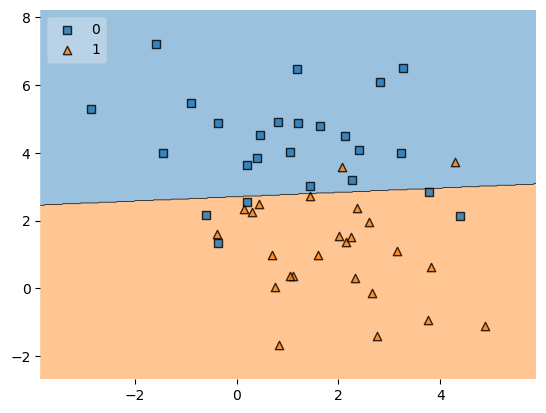

In [122]:
#fit linear kernel on full dataset
svm = SVC(kernel='linear', C = 1.0)
svm.fit(X, y)

plot_decision_regions(X, y, clf=svm, legend=2)
plt.show()

3.Carry out a leave-1-out cross-validation with an SVM on your dataset. Report the train and test performance. Train performance in this case is the performance on the training set, test performance, the performance of the leave-1-out cross-validation.

In [123]:
svm = SVC(kernel='linear')

# Initialize the LOOCV iterator
loo = LeaveOneOut()

train_scores = []
test_scores = []
train_performance = []
test_performance = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
svm.fit(X_train, y_train)
    
train_pred = svm.predict(X_train)
test_pred = svm.predict(X_test)
    
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)
    
train_scores.append(train_accuracy)
test_scores.append(test_accuracy)

# Calculate the mean scores
mean_train_accuracy = sum(train_scores) / len(train_scores)
mean_test_accuracy = sum(test_scores) / len(test_scores)

print("Mean Train Accuracy:", mean_train_accuracy)
print("Mean Test Accuracy:", mean_test_accuracy)

Mean Train Accuracy: 0.8571428571428571
Mean Test Accuracy: 1.0


4.Improve the SVM by changing C. Plot the data set and resulting decision boundary, give the performance.

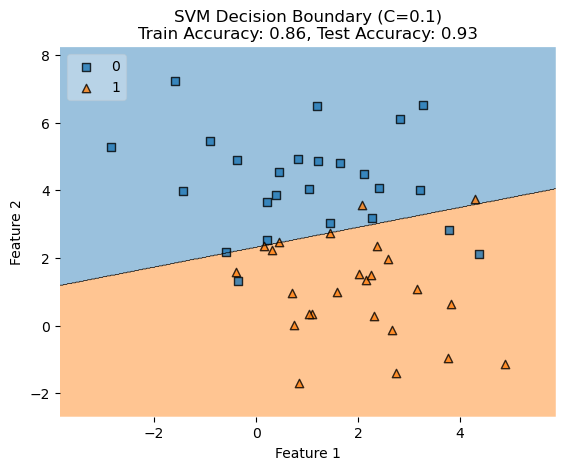

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear', C = 0.1)
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

plot_decision_regions(X=X, y=y, clf=svm, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary (C={})\nTrain Accuracy: {:.2f}, Test Accuracy: {:.2f}'.format(0.1, train_accuracy, test_accuracy))
plt.show()

5.Explain what C does and how it improved the SVM in this case.

In SVM, the parameter C is a regularization parameter determines the penalty for misclassifying training examples. When C is smaller, it allows more misclassifications in the training set, resulting in a wider margin. A smaller value of C encourages the model to have a larger margin and accept more training errors.

By using C=0.1 in this case, we are allowing more misclassifications and prioritizing a wider margin over correctly classifying all training examples. Using C=0.1 in the SVM allows for a wider margin, which may result in better generalization and performance on unseen data.

<b>Q2 DS2</b>

1.Repeat step 1.2 and 1.3 from above with DS2. You can change the leave-1-out cross validation to something different. If you do so, explain what you did and why you chose this evaluation approach.

C:\Users\tejas\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


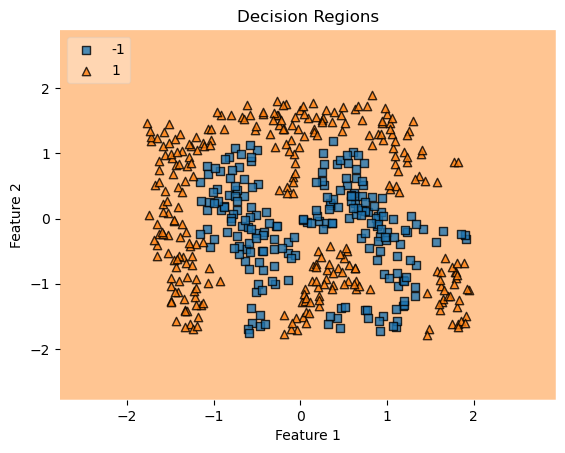

Fold 1 - Train Accuracy: 0.5700, Test Accuracy: 0.5300
Fold 2 - Train Accuracy: 0.5900, Test Accuracy: 0.5100
Fold 3 - Train Accuracy: 0.5675, Test Accuracy: 0.5400
Fold 4 - Train Accuracy: 0.5825, Test Accuracy: 0.5400
Fold 5 - Train Accuracy: 0.5850, Test Accuracy: 0.5300

Mean Train Accuracy: 0.5790
Mean Test Accuracy: 0.5300


In [125]:
#load data
data_ds2 = pd.read_csv('C:/Users/tejas/Downloads/D2.csv', names=['feature1', 'feature2', 'target'])

X = data_ds2[['feature1', 'feature2']]
y = data_ds2['target']

#Scaling X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svm = SVC(kernel='linear', C=0.1)
svm.fit(X_scaled, y)

#PLot the data
plot_decision_regions(X_scaled, y.values, clf=svm, legend=2)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions')
plt.show()

train_scores = []
test_scores = []
train_performance = []
test_performance = []

# Apply K-fold cross validation
kfold = KFold(n_splits=5)

for train_index, test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    svm.fit(X_train, y_train)

    train_pred = svm.predict(X_train)
    test_pred = svm.predict(X_test)

    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    train_performance.append(train_accuracy)
    test_performance.append(test_accuracy)

# Print train and test performance for each fold
for fold in range(len(train_performance)):
    print(f"Fold {fold + 1} - Train Accuracy: {train_performance[fold]:.4f}, Test Accuracy: {test_performance[fold]:.4f}")

mean_train_accuracy = sum(train_performance) / len(train_performance)
mean_test_accuracy = sum(test_performance) / len(test_performance)
print(f"\nMean Train Accuracy: {mean_train_accuracy:.4f}")
print(f"Mean Test Accuracy: {mean_test_accuracy:.4f}")

Here we have used K-fold cross-validation instead of Leave one out cross validation. We have considered 5 folds and calculated the mean accuracy on test and training sets. 

Leave one out cross validation uses all the data samples except one while training the model. This can lead to the model capturing the data variablitiy which may cause the model to overfit the data. To avoid this, we have used K-fold cross-validation where model is trained on different subsets of data.

2.Pick a kernel which will improve the SVM, plot the data set and resulting decision boundary, give the performance.

<AxesSubplot:>

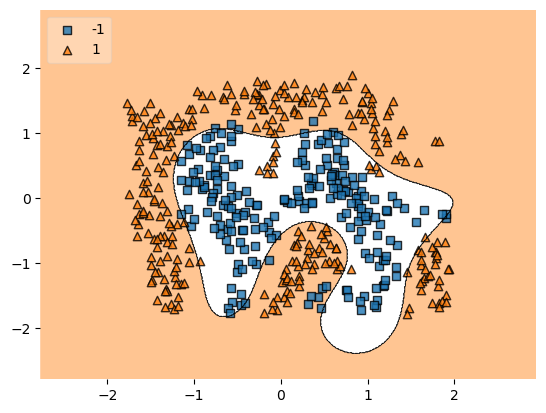

In [126]:
svm = SVC(kernel='rbf',gamma=1, C=1)
svm.fit(X_scaled, y)

#PLot the data
plot_decision_regions(X_scaled, y.values, clf=svm, legend=2)

3.Explain which kernel you chose and why.

For dataset DS2 we have used RBF kernel for SVM. 

Radial Basis function (RBF) is a kernel function also known as Guassian kernel. The function transforms data into higher dimensionality space for classification. It calculates the similarity or how close are two data points to each other.

If we consider the above plots we can see that the data cannot be separated by linear decision boundary. In such cases we can opt for polynomial or RBF kernel which capture the non-linear patterns in data. Here we cannot use polynomial kernel because curved decision boundaries may not be able to capture the patterns in the data accurately.

<b> Q3 DS3</b>

1.Repeat step 1.2 and 1.3 from above with DS3. You can change the leave-1-out cross validation to something different. If you do so, explain what you did and why you chose this evaluation approach.

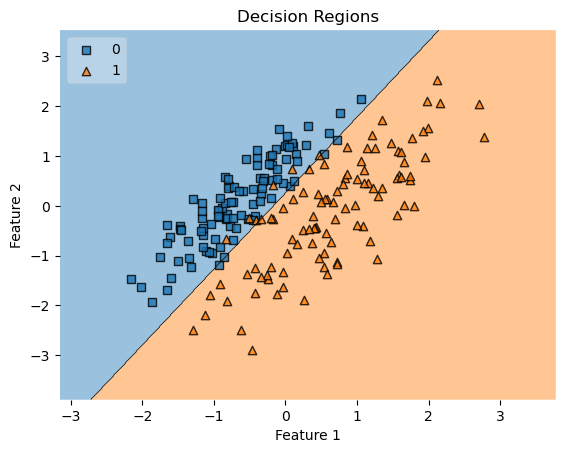

Fold 1 - Train Accuracy: 0.9812, Test Accuracy: 0.8500
Fold 2 - Train Accuracy: 0.9375, Test Accuracy: 1.0000
Fold 3 - Train Accuracy: 0.9625, Test Accuracy: 0.9250
Fold 4 - Train Accuracy: 0.9563, Test Accuracy: 0.9750
Fold 5 - Train Accuracy: 0.9437, Test Accuracy: 0.9750

Mean Train Accuracy: 0.9563
Mean Test Accuracy: 0.9450


In [127]:
#load data
data_ds2 = pd.read_csv('C:/Users/tejas/Downloads/D3.csv', names=['feature1', 'feature2', 'target'])

X = data_ds2[['feature1', 'feature2']]
y = data_ds2['target']

#Scaling X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svm = SVC(kernel='linear', C=10)
svm.fit(X_scaled, y)

#PLot the data
plot_decision_regions(X_scaled, y.values, clf=svm, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions')
plt.show()

train_scores = []
test_scores = []
train_performance = []
test_performance = []

# Apply K-fold cross validation
kfold = KFold(n_splits=5)

for train_index, test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    svm.fit(X_train, y_train)

    train_pred = svm.predict(X_train)
    test_pred = svm.predict(X_test)

    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    train_performance.append(train_accuracy)
    test_performance.append(test_accuracy)

# Print train and test performance for each fold
for fold in range(len(train_performance)):
    print(f"Fold {fold + 1} - Train Accuracy: {train_performance[fold]:.4f}, Test Accuracy: {test_performance[fold]:.4f}")

mean_train_accuracy = sum(train_performance) / len(train_performance)
mean_test_accuracy = sum(test_performance) / len(test_performance)
print(f"\nMean Train Accuracy: {mean_train_accuracy:.4f}")
print(f"Mean Test Accuracy: {mean_test_accuracy:.4f}")

Here we have used K-fold cross validation again to avoid overfitting model.

2.Pick a kernel and 2 hyperparameters to optimize, optimize the hyperparameters (similar to Assignment 1), plot again data set and decision boundary and give the performance.

Train Accuracy: 0.9563
Test Accuracy: 0.9500
Best C: 10
Best gamma: 0.1


C:\Users\tejas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


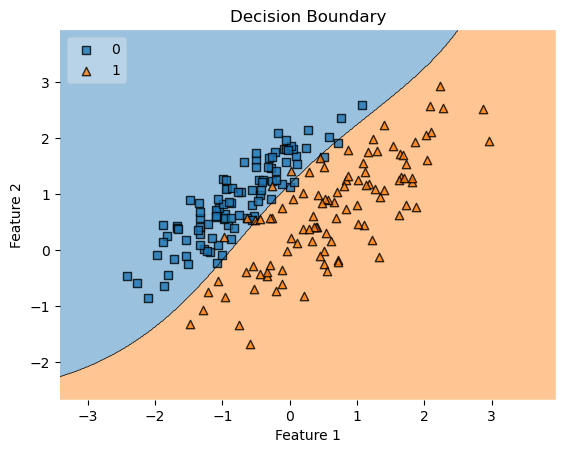

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#hyperparameters C and gamma to be optimized
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}

svm = SVC(kernel='rbf')

#Grid search 
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']

best_svm = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
best_svm.fit(X_train, y_train)

#Predictions
train_predictions = best_svm.predict(X_train)
test_predictions = best_svm.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Best C: {best_C}")
print(f"Best gamma: {best_gamma}")

# Plot the decision boundary and data points
plot_decision_regions(X.to_numpy(), y.to_numpy(), clf=best_svm, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.show()

3.Explain the results of the previous step.

We can see that the training data and test data accuracy is almost 95% which is almost same as the linear kernel accuracy. We can also see that this accuracy is achieved by using C and gamma values as 10 and 0.1 respectively. Here higher C value indicates strong regularization which will not allow overfitting. Lower gamma value indicates larger influence of each training sample. 
Overall the accuracy of RBF kernel is almost same as linear kernel with good performance on test data.